In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv("./Aicon/02.격자단위_구급출동_dataset.csv")

In [90]:
data.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX
0,38045314,380475,531475,0,20200101,4213000000,2.88,0.72,0,0,0,0,0,0,0,0
1,38045324,380475,532475,0,20200101,4213000000,9.36,1.44,0,0,0,0,0,0,0,0
2,38145354,381475,535475,0,20200101,4213000000,3.93,0.15,0,0,0,0,0,0,0,0
3,38245184,382475,518475,0,20200101,4213000000,2.69,0.16,0,0,0,0,0,0,0,0
4,38245194,382475,519475,0,20200101,4213000000,2.35,0.14,0,0,0,0,0,0,0,0


In [91]:
# data 전처리
from datetime import datetime
data['month']=data['YMD'].map(lambda x: datetime.strptime(str(x), '%Y%m%d').month)
data['day']=data['YMD'].map(lambda x: datetime.strptime(str(x), '%Y%m%d').day)

In [92]:
rect_table = pd.pivot_table(data, values= ["DSP_CNT_IDEX","RELIFPLC_DWL_IDEX","RELIFPLC_ROAD_IDEX",'RELIFPLC_INDUST_IDEX','RELIFPLC_NTR_IDEX','RELIFPLC_ETC_IDEX','DISEASE_DSP_IDEX','DISEASE_EXCL_DSP_IDEX'] , index=['GRID_ID'], aggfunc=np.sum)

In [93]:
rect_table.head()

,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,DSP_CNT_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ETC_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ROAD_IDEX
GRID_ID,,,,,,,,
37645864,1,0,1,1,0,0,0,0
37745114,12,11,23,12,2,0,4,5
37745124,5,3,8,5,0,0,0,0
37745144,0,4,4,0,1,0,1,0
37745154,0,13,13,0,0,0,2,8


In [94]:
for i in rect_table.index:
    check=rect_table.loc[i,'DISEASE_DSP_IDEX']+rect_table.loc[i,'DISEASE_EXCL_DSP_IDEX']
    if check!=rect_table.loc[i,'DSP_CNT_IDEX']:
        print(rect_table.index(i))

In [95]:
not_list=[]
for i in rect_table.index:
    check=rect_table.loc[i,'RELIFPLC_DWL_IDEX']+rect_table.loc[i,'RELIFPLC_ETC_IDEX']+rect_table.loc[i,'RELIFPLC_INDUST_IDEX']+rect_table.loc[i,'RELIFPLC_NTR_IDEX']+rect_table.loc[i,'RELIFPLC_ROAD_IDEX']
    if check!=rect_table.loc[i,'DSP_CNT_IDEX']:
        not_list.append(i)

In [96]:
len(not_list)

305

In [97]:
sum(data['RELIFPLC_DWL_IDEX'])+sum(data['RELIFPLC_ETC_IDEX'])+sum(data['RELIFPLC_INDUST_IDEX'])+sum(data['RELIFPLC_NTR_IDEX'])+sum(data['RELIFPLC_ROAD_IDEX'])

14541

In [98]:
sum(data['DSP_CNT_IDEX'])

16474

### 구급 지수(5가지)는 제공받은 데이터가 정확하지 않아서 고려할 수 없음

# 구급빈도, 유동인구, 노인인구 월, 시간 그래프 확인

In [99]:
data.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,month,day
0,38045314,380475,531475,0,20200101,4213000000,2.88,0.72,0,0,0,0,0,0,0,0,1,1
1,38045324,380475,532475,0,20200101,4213000000,9.36,1.44,0,0,0,0,0,0,0,0,1,1
2,38145354,381475,535475,0,20200101,4213000000,3.93,0.15,0,0,0,0,0,0,0,0,1,1
3,38245184,382475,518475,0,20200101,4213000000,2.69,0.16,0,0,0,0,0,0,0,0,1,1
4,38245194,382475,519475,0,20200101,4213000000,2.35,0.14,0,0,0,0,0,0,0,0,1,1


In [100]:
len(data)

1769078

In [101]:
# 출동빈도지수가 0 초과인 것만 가져오기
data_=data.query("DSP_CNT_IDEX>0")

In [103]:
# 출동빈도지수 0인것과 유동인구 비교하기 위함
not_data=data.query("DSP_CNT_IDEX==0")

In [106]:
len(data_)

14889

In [105]:
len(not_data)

1754189

In [107]:
data_.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,month,day
28,38545254,385475,525475,0,20200101,4213000000,7.57,0.49,1,0,0,0,0,1,1,0,1,1
73,39345264,393475,526475,0,20200101,4213000000,1991.34,79.17,1,0,0,0,0,2,1,1,1,1
84,39445284,394475,528475,0,20200101,4213000000,1515.30,80.44,1,0,0,0,0,1,1,0,1,1
106,39645274,396475,527475,0,20200101,4213000000,389.21,63.22,0,0,1,0,0,1,0,1,1,1
216,39445284,394475,528475,1,20200101,4213000000,1539.88,79.37,0,0,0,0,0,1,0,1,1,1


In [117]:
dsp_table = pd.pivot_table(data_, values= ["DSP_CNT_IDEX"] , index=['month','TIME'], aggfunc=np.sum)

In [118]:
fp_table = pd.pivot_table(data_, values= ["FP_IDEX"] , index=['month','TIME'], aggfunc=np.mean)

In [131]:
oldfp_table = pd.pivot_table(data_, values= ["OLD_FP_IDEX"] , index=['month','TIME'], aggfunc=np.mean)

In [127]:
# 출동빈도 0
fp_table0 = pd.pivot_table(not_data, values= ["FP_IDEX"] , index=['month','TIME'], aggfunc=np.mean)

In [132]:
# 출동빈도 0
oldfp_table0 = pd.pivot_table(not_data, values= ["OLD_FP_IDEX"] , index=['month','TIME'], aggfunc=np.mean)

In [125]:
month_1=dsp_table.query("month==1").reset_index()
month_2=dsp_table.query("month==2").reset_index()

In [126]:
month_1

,month,TIME,DSP_CNT_IDEX
0,1,0,49
1,1,1,33
2,1,2,30
3,1,3,30
4,1,4,37
5,1,5,28
6,1,6,41
7,1,7,52
8,1,8,84
9,1,9,70


<function matplotlib.pyplot.show(*args, **kw)>

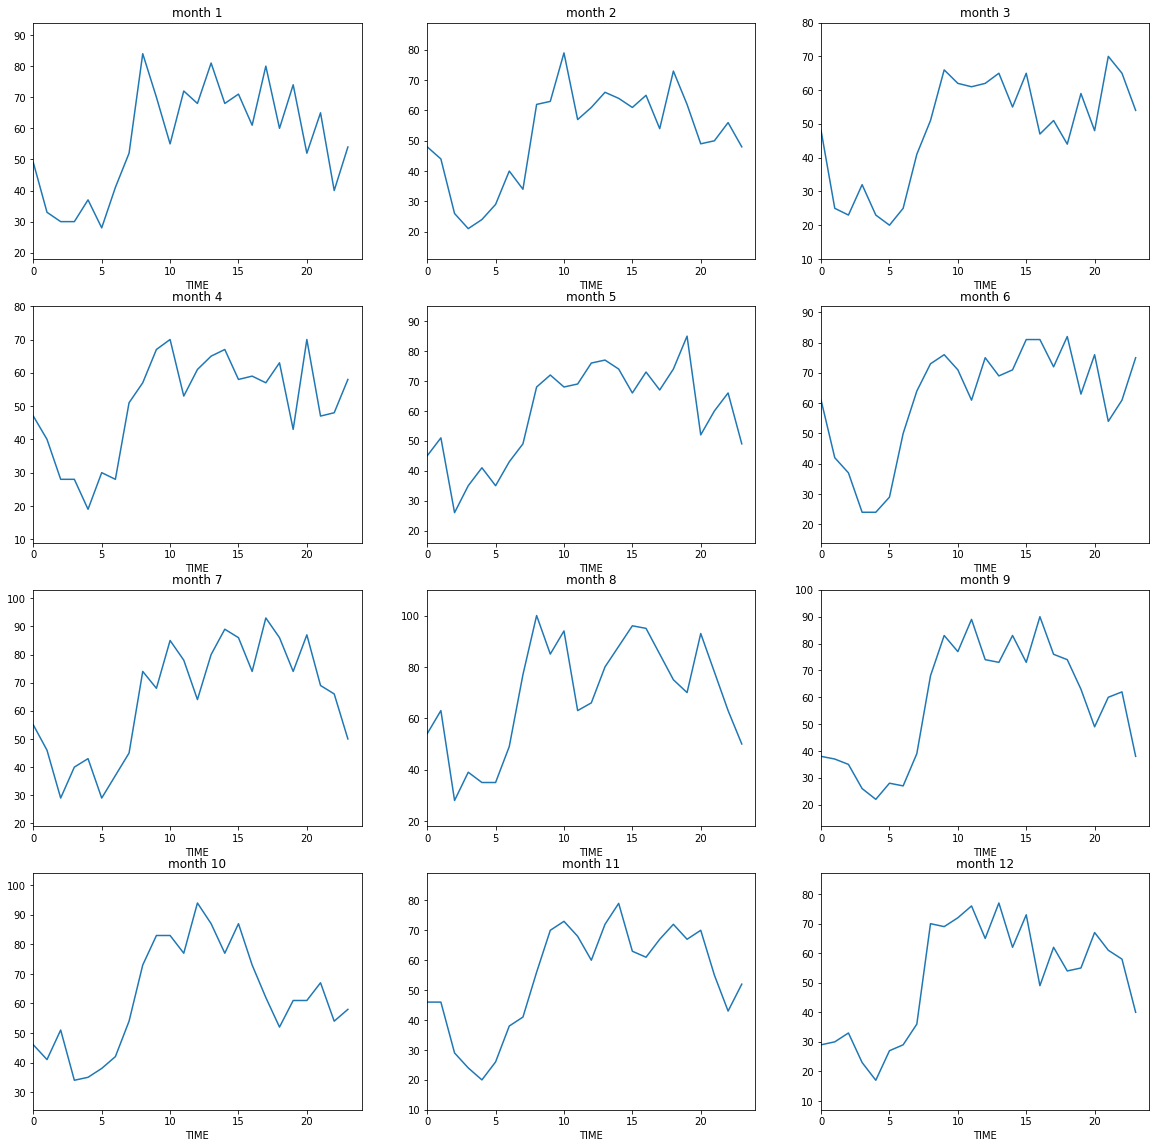

In [124]:
# 월별 시간대 총 출동빈도지수
fig=plt.figure(figsize=(20,20))
for i in range(1, 13):
    month=dsp_table.query("month==@i").reset_index()
    ax=fig.add_subplot(4,3,i)
    ax.plot(month['TIME'], month['DSP_CNT_IDEX'])
    ax.set(xlim=[0.,24.], ylim=[min(month['DSP_CNT_IDEX'])-10,max(month['DSP_CNT_IDEX'])+10])
    ax.set_title('month '+str(i))
    ax.set_xlabel('TIME')
plt.show

In [171]:
fp_table.head()

FP_IDEX
month TIME             
1     0     1006.014255
      1     1140.711613
      2      838.169000
      3     1068.852414
      4     1108.860286

<function matplotlib.pyplot.show(*args, **kw)>

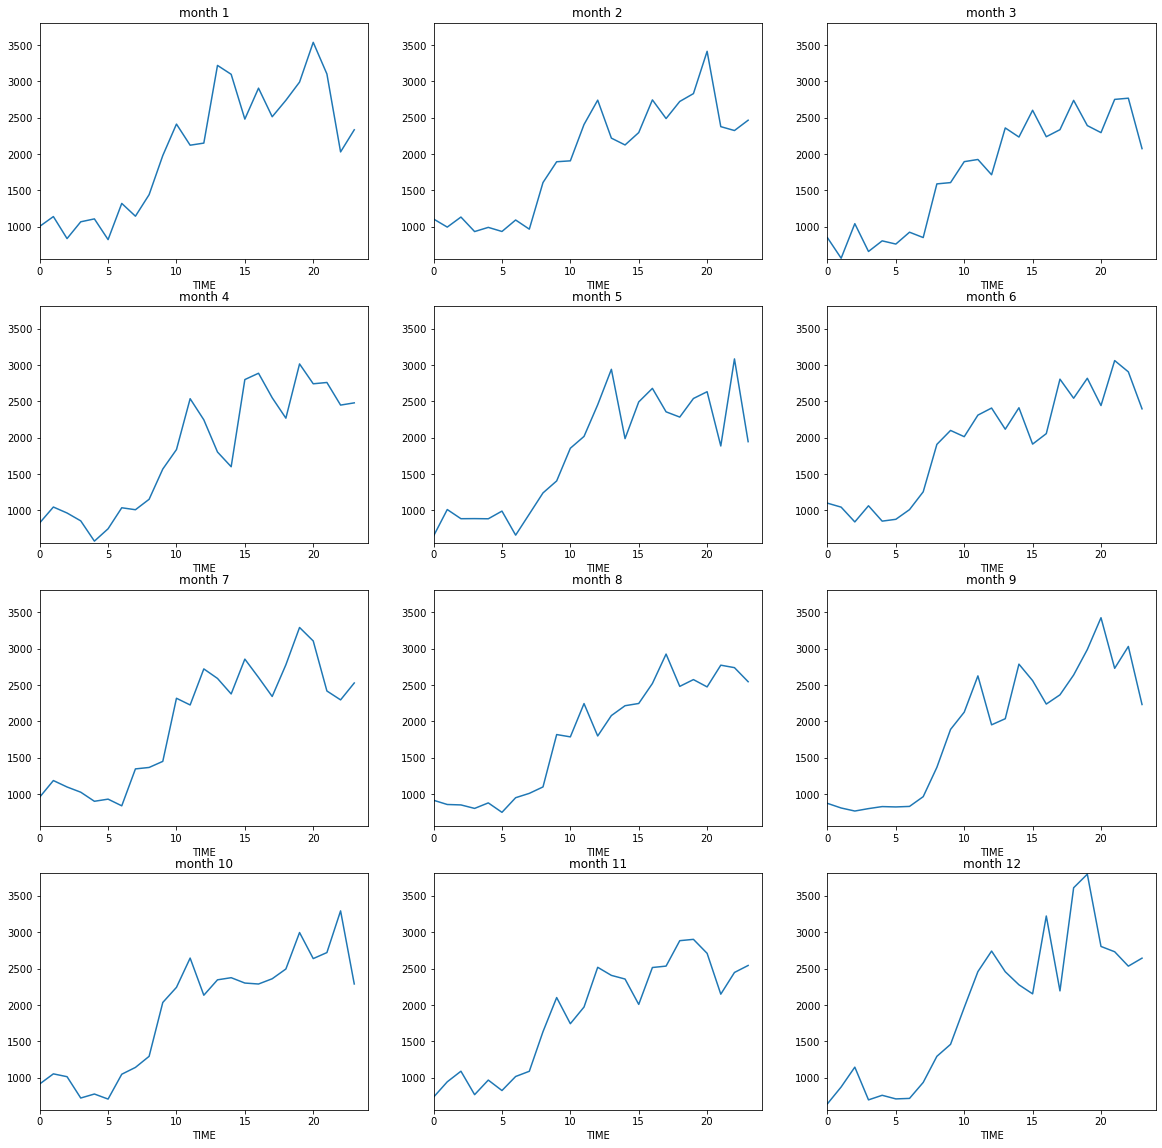

In [142]:
# 월별 시간대 평균 유동인구지수
fig=plt.figure(figsize=(20,20))
for i in range(1, 13):
    month=fp_table.query("month==@i").reset_index()
    ax=fig.add_subplot(4,3,i)
    ax.plot(month['TIME'], month['FP_IDEX'])
    ax.set(xlim=[0.,24.], ylim=[min(fp_table['FP_IDEX'])-10,max(fp_table['FP_IDEX'])+10])
    ax.set_title('month '+str(i))
    ax.set_xlabel('TIME')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

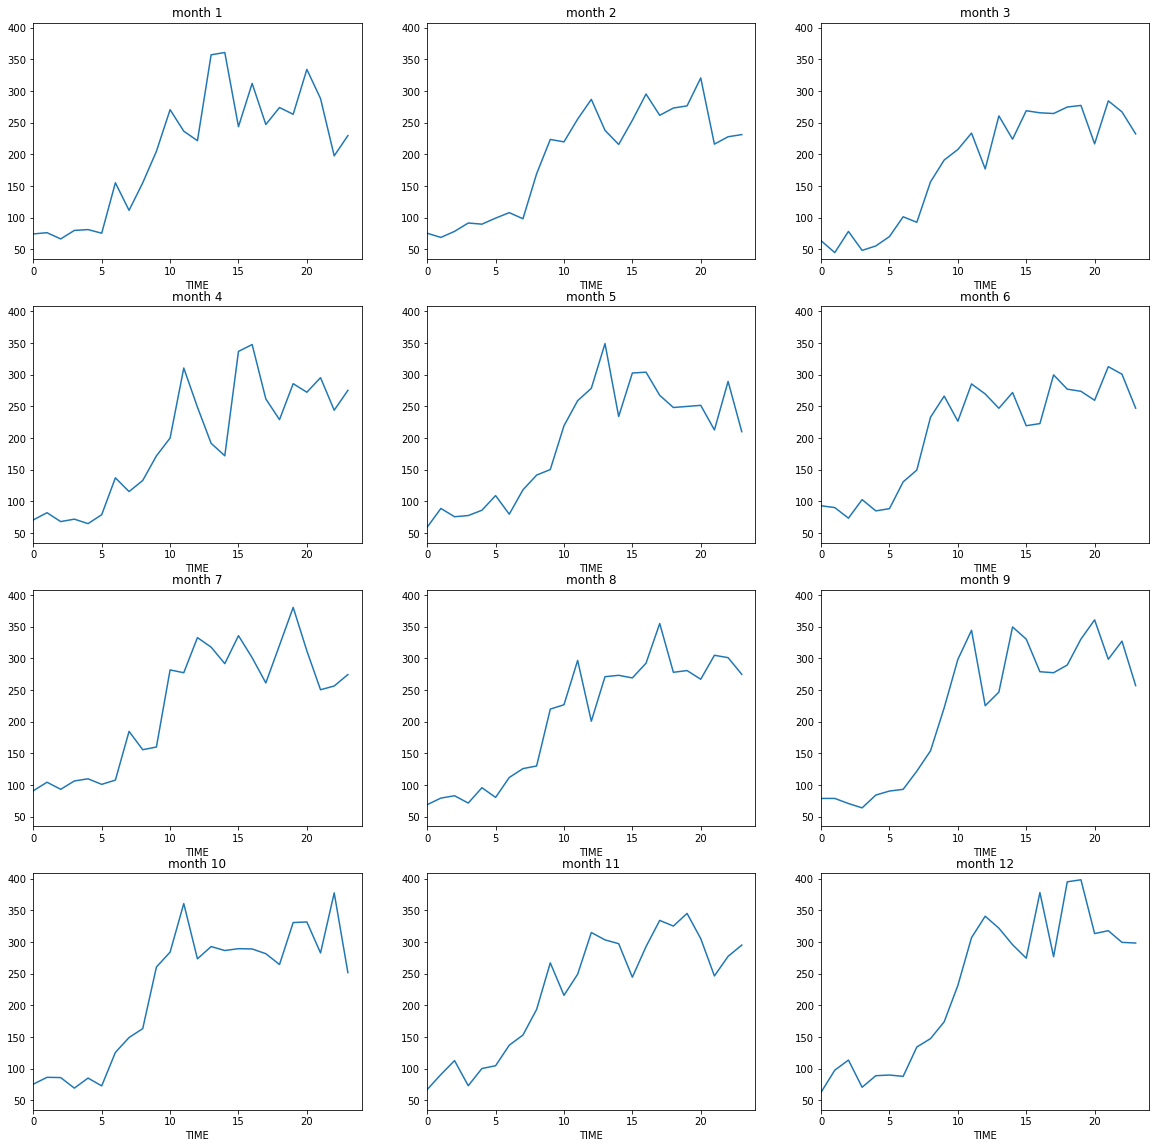

In [141]:
# 월별 시간대 평균 노인유동인구지수
fig=plt.figure(figsize=(20,20))
for i in range(1, 13):
    month=oldfp_table.query("month==@i").reset_index()
    ax=fig.add_subplot(4,3,i)
    ax.plot(month['TIME'], month['OLD_FP_IDEX'])
    ax.set(xlim=[0.,24.], ylim=[min(oldfp_table['OLD_FP_IDEX'])-10,max(oldfp_table['OLD_FP_IDEX'])+10])
    ax.set_title('month '+str(i))
    ax.set_xlabel('TIME')
plt.show

In [170]:
fp_table0.head()

FP_IDEX
month TIME            
1     0     277.717513
      1     293.900381
      2     283.165705
      3     273.318822
      4     267.995911

<function matplotlib.pyplot.show(*args, **kw)>

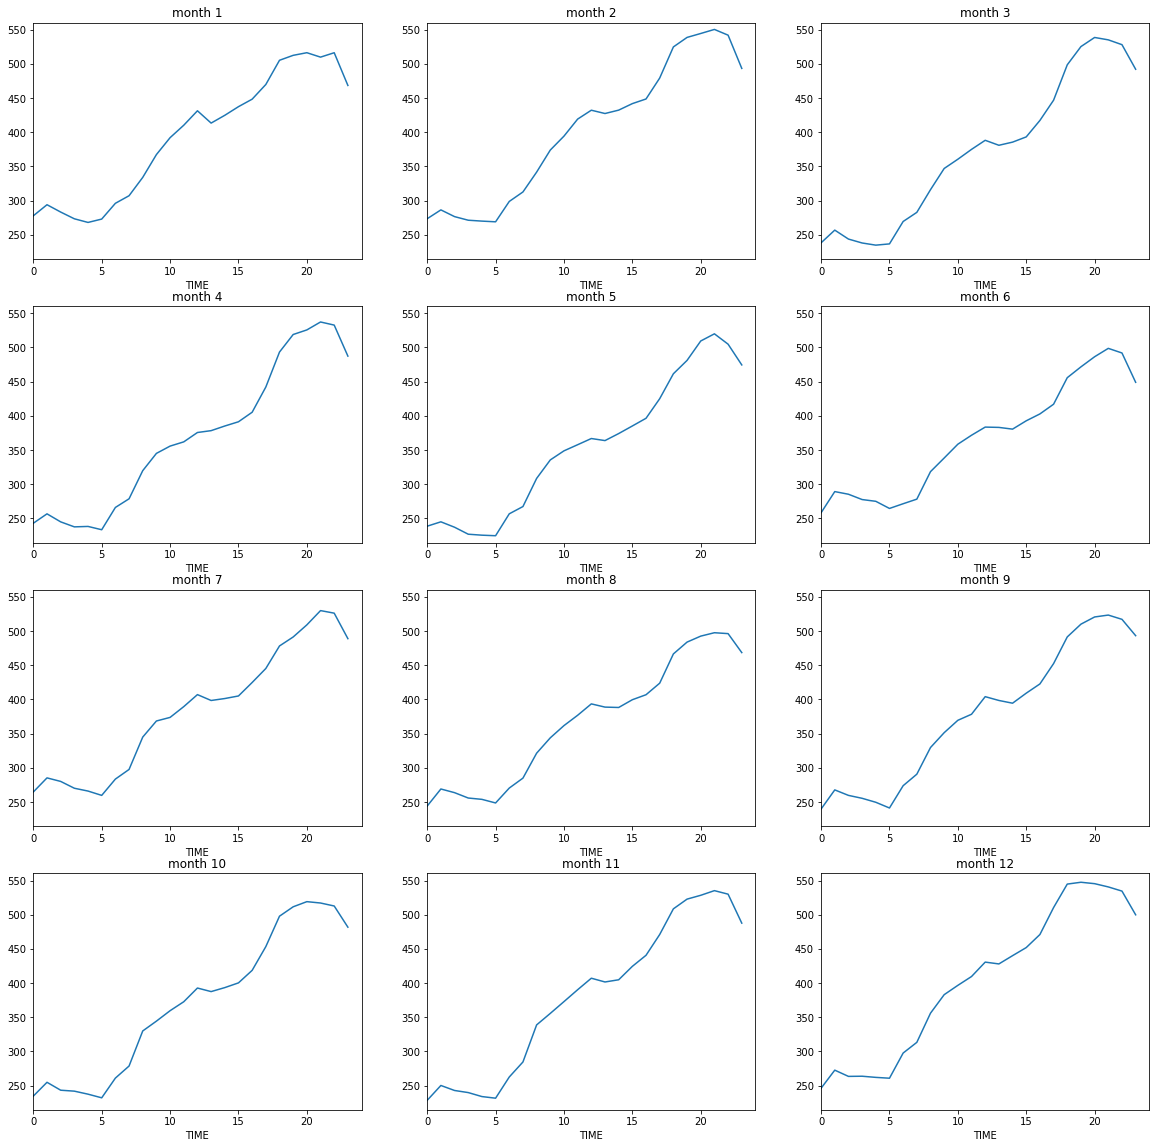

In [140]:
# 월별 시간대 평균 유동인구지수 (출동빈도 0 인 경우)
fig=plt.figure(figsize=(20,20))
for i in range(1, 13):
    month=fp_table0.query("month==@i").reset_index()
    ax=fig.add_subplot(4,3,i)
    ax.plot(month['TIME'], month['FP_IDEX'])
    ax.set(xlim=[0.,24.], ylim=[min(fp_table0['FP_IDEX'])-10,max(fp_table0['FP_IDEX'])+10])
    ax.set_title('month '+str(i))
    ax.set_xlabel('TIME')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

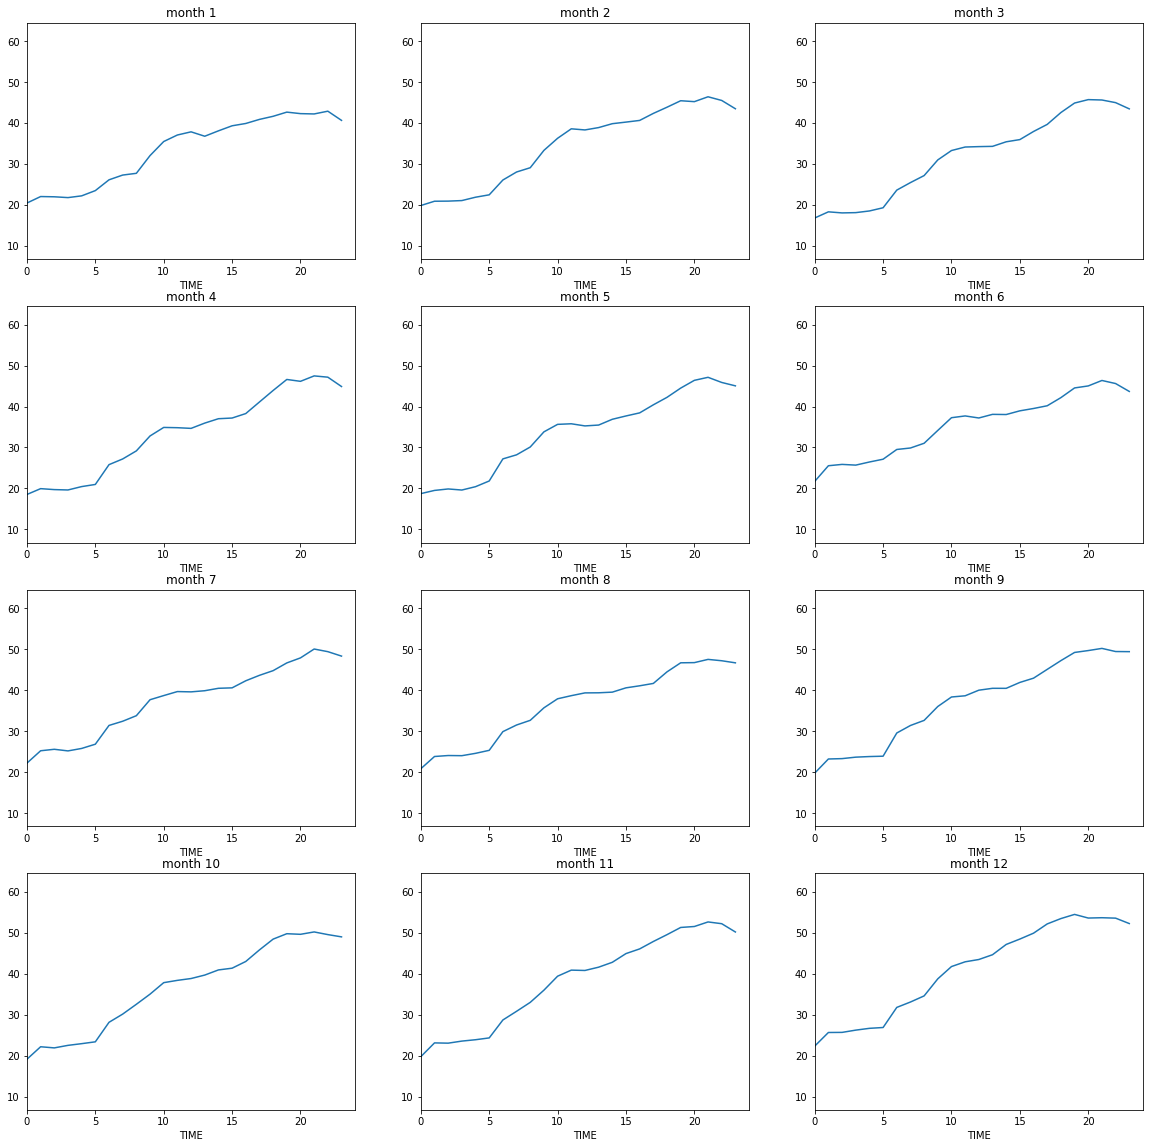

In [139]:
# 월별 시간대 평균 노인유동인구지수 (출동빈도 0 인 경우)
fig=plt.figure(figsize=(20,20))
for i in range(1, 13):
    month=oldfp_table0.query("month==@i").reset_index()
    ax=fig.add_subplot(4,3,i)
    ax.plot(month['TIME'], month['OLD_FP_IDEX'])
    ax.set(xlim=[0.,24.], ylim=[min(oldfp_table0['OLD_FP_IDEX'])-10,max(oldfp_table0['OLD_FP_IDEX'])+10])
    ax.set_title('month '+str(i))
    ax.set_xlabel('TIME')
plt.show

In [143]:
# 상관관계 보기
total_table=pd.concat([dsp_table,fp_table,oldfp_table], axis=1)

In [149]:
total_table.head()

DSP_CNT_IDEX      FP_IDEX  OLD_FP_IDEX
month TIME                                        
1     0               49  1006.014255    74.459362
      1               33  1140.711613    76.386774
      2               30   838.169000    66.548000
      3               30  1068.852414    79.970345
      4               37  1108.860286    81.293429

In [147]:
corr_=total_table.corr(method='pearson').round(2)

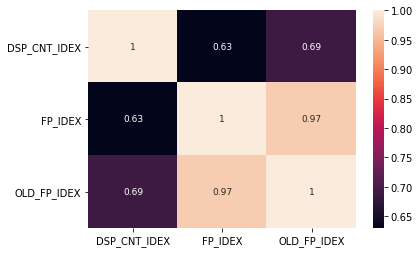

In [148]:
sns.heatmap(data=corr_, annot=True, annot_kws={"size":9}) # 노인과 유동인구는 PCA이용해서 변수추출 하기.

# 구급빈도, 유동인구, 노인인구 격자별 시간 그래프 확인

In [191]:
gr_dsp_table = pd.pivot_table(data_, values= ["DSP_CNT_IDEX"] , index=['GRID_ID'], aggfunc=np.sum)

In [194]:
gr_dsp_table.head()

,DSP_CNT_IDEX
GRID_ID,
37645864,1
37745114,23
37745124,8
37745144,4
37745154,13


In [195]:
gr_fp_table = pd.pivot_table(data_, values= ["FP_IDEX"] , index=['GRID_ID'], aggfunc=np.sum)

In [197]:
gr_oldfp_table = pd.pivot_table(data_, values= ["OLD_FP_IDEX"] , index=['GRID_ID'], aggfunc=np.sum)

In [208]:
gr_fp_table.head()

,FP_IDEX
GRID_ID,
37645864,0.00
37745114,32.86
37745124,3.35
37745144,0.00
37745154,0.00


In [207]:
gr_oldfp_table.head()

,OLD_FP_IDEX
GRID_ID,
37645864,0.00
37745114,6.04
37745124,0.16
37745144,0.00
37745154,0.00


In [210]:
# 데이터 확인 (포함관계인지)
for i in gr_oldfp_table.index:
    if gr_oldfp_table.loc[i,'OLD_FP_IDEX']>gr_fp_table.loc[i,'FP_IDEX']:
        print(i)

In [214]:
# 유동인구가 있는데 구급출동빈도가 있는 격자 확인
not_fp_dsp=gr_fp_table.query("FP_IDEX==0")

In [218]:
not_fp_dsp.head()

,FP_IDEX
GRID_ID,
37645864,0.0
37745144,0.0
37745154,0.0
37845084,0.0
37845094,0.0


In [219]:
not_fp_dsp_total=pd.DataFrame(columns=data_.columns)
for i in not_fp_dsp.index:
    temp=data_.query("GRID_ID==@i")
    not_fp_dsp_total=pd.concat([not_fp_dsp_total,temp])

In [221]:
not_fp_dsp_total.reset_index(inplace=True, drop=True)

In [223]:
not_fp_dsp_total.to_csv("후덜덜한data.csv",index=False)  # 출동빈도가 0인데 유동인구가 없다? 이 데이터 내에서 설명 불가

In [190]:
data_

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,month,day
28,38545254,385475,525475,0,20200101,4213000000,7.57,0.49,1,0,0,0,0,1,1,0,1,1
73,39345264,393475,526475,0,20200101,4213000000,1991.34,79.17,1,0,0,0,0,2,1,1,1,1
84,39445284,394475,528475,0,20200101,4213000000,1515.30,80.44,1,0,0,0,0,1,1,0,1,1
106,39645274,396475,527475,0,20200101,4213000000,389.21,63.22,0,0,1,0,0,1,0,1,1,1
216,39445284,394475,528475,1,20200101,4213000000,1539.88,79.37,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768431,39945214,399475,521475,20,20201230,4213000000,11.99,1.68,0,0,1,0,0,1,1,0,12,30
1768574,39445264,394475,526475,21,20201230,4213000000,4563.22,379.53,0,1,0,0,0,1,0,1,12,30
1768632,39845244,398475,524475,21,20201230,4213000000,1245.73,56.89,1,0,0,0,0,1,0,1,12,30
1768881,39445374,394475,537475,22,20201230,4213000000,0.00,0.00,0,0,0,0,0,2,0,2,12,30


In [17]:
time=list(month_1['TIME'].values)

In [172]:
# 시간별 가설 검증 (유동인구)
month_dic={}
total=data_.groupby(['month','day','TIME'])['FP_IDEX'].mean().reset_index()
for (m,t), group in total.groupby(['month','TIME']):
    if m not in month_dic.keys():
        month_dic[m]=group.reset_index(drop=True)
    else:
        month_dic[m]=pd.concat([month_dic[m],group.reset_index(drop=True)], axis=0)
        month_dic[m].reset_index(inplace=True, drop=True)

In [189]:
month_dic[1].query('TIME==1')

,month,day,TIME,FP_IDEX
23,1,1,1,2233.855
24,1,2,1,1276.695
25,1,4,1,1294.775
26,1,5,1,178.810
27,1,6,1,365.610
28,1,8,1,1061.530
29,1,9,1,274.115
30,1,10,1,1402.920
31,1,12,1,945.660
32,1,13,1,1570.805


In [176]:
month_dic_1 = pd.pivot_table(month_dic[1], values= ["FP_IDEX"] , index=['TIME'], aggfunc=np.median)

In [178]:
fp_table

FP_IDEX
month TIME             
1     0     1006.014255
      1     1140.711613
      2      838.169000
      3     1068.852414
      4     1108.860286
...                 ...
12    19    3797.746957
      20    2804.060984
      21    2731.228793
      22    2533.180625
      23    2643.126571

[288 rows x 1 columns]

In [177]:
month_dic_1

,FP_IDEX
TIME,
0,975.855000
1,1169.112500
2,734.356667
3,1031.342500
4,932.530000
5,752.365000
6,1335.452500
7,1281.405833
8,1296.622500


In [162]:
temp=month_dic[1].query("TIME==0")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DBF768910>,
      dtype=object)

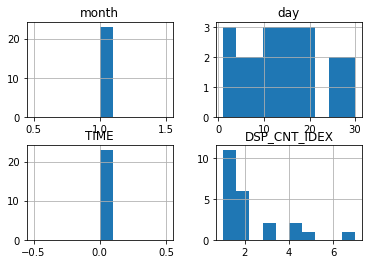

In [163]:
temp.hist()

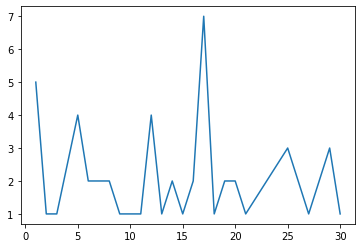

In [165]:
plt.plot(temp['day'],temp['DSP_CNT_IDEX'])

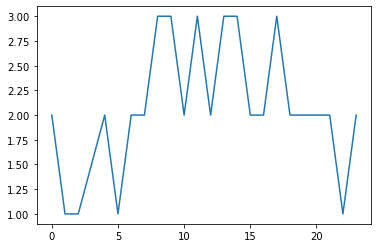

In [166]:
plt.plot(month_dic_1.index,month_dic_1['DSP_CNT_IDEX'])

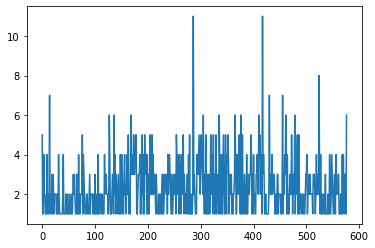

In [167]:
plt.plot(month_dic[1].index,month_dic[1]['DSP_CNT_IDEX'])

In [47]:
month_dic[1]

,month,day,TIME,DSP_CNT_IDEX
0,1,1,0,5
1,1,2,0,1
2,1,3,0,1
3,1,4,0,0
4,1,5,0,4
...,...,...,...,...
715,1,26,23,3
716,1,27,23,1
717,1,28,23,3
718,1,29,23,1


In [26]:
data

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,month,day
0,38045314,380475,531475,0,20200101,4213000000,2.88,0.72,0,0,0,0,0,0,0,0,1,1
1,38045324,380475,532475,0,20200101,4213000000,9.36,1.44,0,0,0,0,0,0,0,0,1,1
2,38145354,381475,535475,0,20200101,4213000000,3.93,0.15,0,0,0,0,0,0,0,0,1,1
3,38245184,382475,518475,0,20200101,4213000000,2.69,0.16,0,0,0,0,0,0,0,0,1,1
4,38245194,382475,519475,0,20200101,4213000000,2.35,0.14,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769073,40245274,402475,527475,23,20201230,4213000000,25.48,1.04,0,0,0,0,0,0,0,0,12,30
1769074,40545364,405475,536475,23,20201230,4213000000,1.21,0.32,0,0,0,0,0,0,0,0,12,30
1769075,40645144,406475,514475,23,20201230,4213000000,1.28,0.30,0,0,0,0,0,0,0,0,12,30
1769076,40745144,407475,514475,23,20201230,4213000000,6.17,1.47,0,0,0,0,0,0,0,0,12,30


In [27]:
total=data.groupby(['GRID_ID','month','day','TIME'])['FP_IDEX'].sum().reset_index()

In [28]:
total

,GRID_ID,month,day,TIME,FP_IDEX
0,37645864,1,4,9,0.00
1,37745114,1,3,12,2.07
2,37745114,1,3,13,4.35
3,37745114,1,5,13,0.00
4,37745114,1,7,10,3.09
...,...,...,...,...,...
1769073,44145094,7,9,18,0.00
1769074,44945564,2,18,17,0.00
1769075,45045614,10,9,20,0.00
1769076,48845074,12,18,15,0.00


In [127]:
total.query("GRID_ID==3853124")

,GRID_ID,month,day,TIME,FP_IDEX


In [135]:
total.query("GRID_ID==37745114 and month==1 and TIME==12")

,GRID_ID,month,day,TIME,FP_IDEX
1,37745114,1,3,12,2.07
6,37745114,1,7,12,5.37
8,37745114,1,10,12,3.24
11,37745114,1,15,12,4.33
12,37745114,1,16,12,1.06
14,37745114,1,24,12,4.47
31,37745114,1,25,12,5.33
38,37745114,1,26,12,3.12


In [52]:
# 다중선형회귀 살펴보기
total_table = pd.pivot_table(data, values= ["DSP_CNT_IDEX"] , index=['month','TIME'], aggfunc=np.sum)

DSP_CNT_IDEX
month TIME              
1     0               49
      1               33
      2               30
      3               30
      4               37
...                  ...
12    19              55
      20              67
      21              61
      22              58
      23              40

[288 rows x 1 columns]